In [1]:
import plotly.express as px
import pandas as pd 
import matplotlib as mlp
import matplotlib.pyplot as plt
import datetime
from datetime import date
import matplotlib.dates as mdates
pd.set_option('display.max_colwidth', 100)

In [3]:
df_source = pd.read_csv('Monthly_Economic_Indicators.csv')
df_source.head()

,Date,Calgary (CER) Unemployment rate (%),Alberta Unemployment Rate (%),Canada Unemployment rate (%),Calgary (CER) Total Employment ('000 Persons),Calgary (CER) Total Employment month-over-month change ('000 Persons),Calgary (CER) Total Employment year-over-year change ('000 Persons),Calgary (CMA) Average Hourly Wage Rate ($),City of Calgary Building Permits Residential Value ($),City of Calgary Building Permits Non-Residential Value ($),Calgary (City) Total Housing Starts (units),Calgary (CMA) Total Housing Starts (units),Calgary (CER) Retail Sales ($billions),Calgary (CMA) Inflation Rate (%change)
0,1972-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,322,NaN,3.90
1,1972-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,527,NaN,3.86
2,1972-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,590,NaN,3.38
3,1972-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,580,NaN,3.86
4,1972-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,915,NaN,4.35


In [31]:
df = df_source.dropna()

In [ ]:
def dateobject(date):
        dateobject = datetime.datetime.strptime(str(date), "%Y-%m-%d")
        dateobject = dateobject.isoformat()
        return dateobject
df['Date'] = df['Date'].map(dateobject)
df.head(4)

,index,Unemployment_Rate,Alberta Unemployment Rate (%),Canada Unemployment rate (%),Calgary (CER) Total Employment ('000 Persons),Calgary (CER) Total Employment month-over-month change ('000 Persons),Calgary (CER) Total Employment year-over-year change ('000 Persons),Calgary (CMA) Average Hourly Wage Rate ($),Residential_Permit_Value,NonResidential_Permit_Value,Calgary (City) Total Housing Starts (units),Calgary (CMA) Total Housing Starts (units),Calgary (CER) Retail Sales ($billions),Inflation_Rate
Date,,,,,,,,,,,,,,
2023-02-01,613,6.7,6.0,5.1,914.3,-9.2,19.6,36.5,273759879.6,1.255071e+08,1032.0,1238,3.42,3.93
2023-03-01,614,7.0,6.3,5.4,916.3,2.0,20.9,36.2,342689734.2,1.402097e+08,937.0,1094,3.36,3.69
2023-04-01,615,6.4,6.3,5.3,931.9,15.6,24.3,36.3,405612618.2,1.097444e+08,904.0,1164,3.39,4.88
2023-05-01,616,6.0,6.0,5.3,946.9,15.0,28.1,36.1,474862801.6,1.099356e+08,1836.0,2076,3.47,3.49
2023-06-01,617,5.8,5.8,5.2,966.0,19.1,27.3,36.0,398253739.1,8.404043e+07,1025.0,1239,3.46,2.03


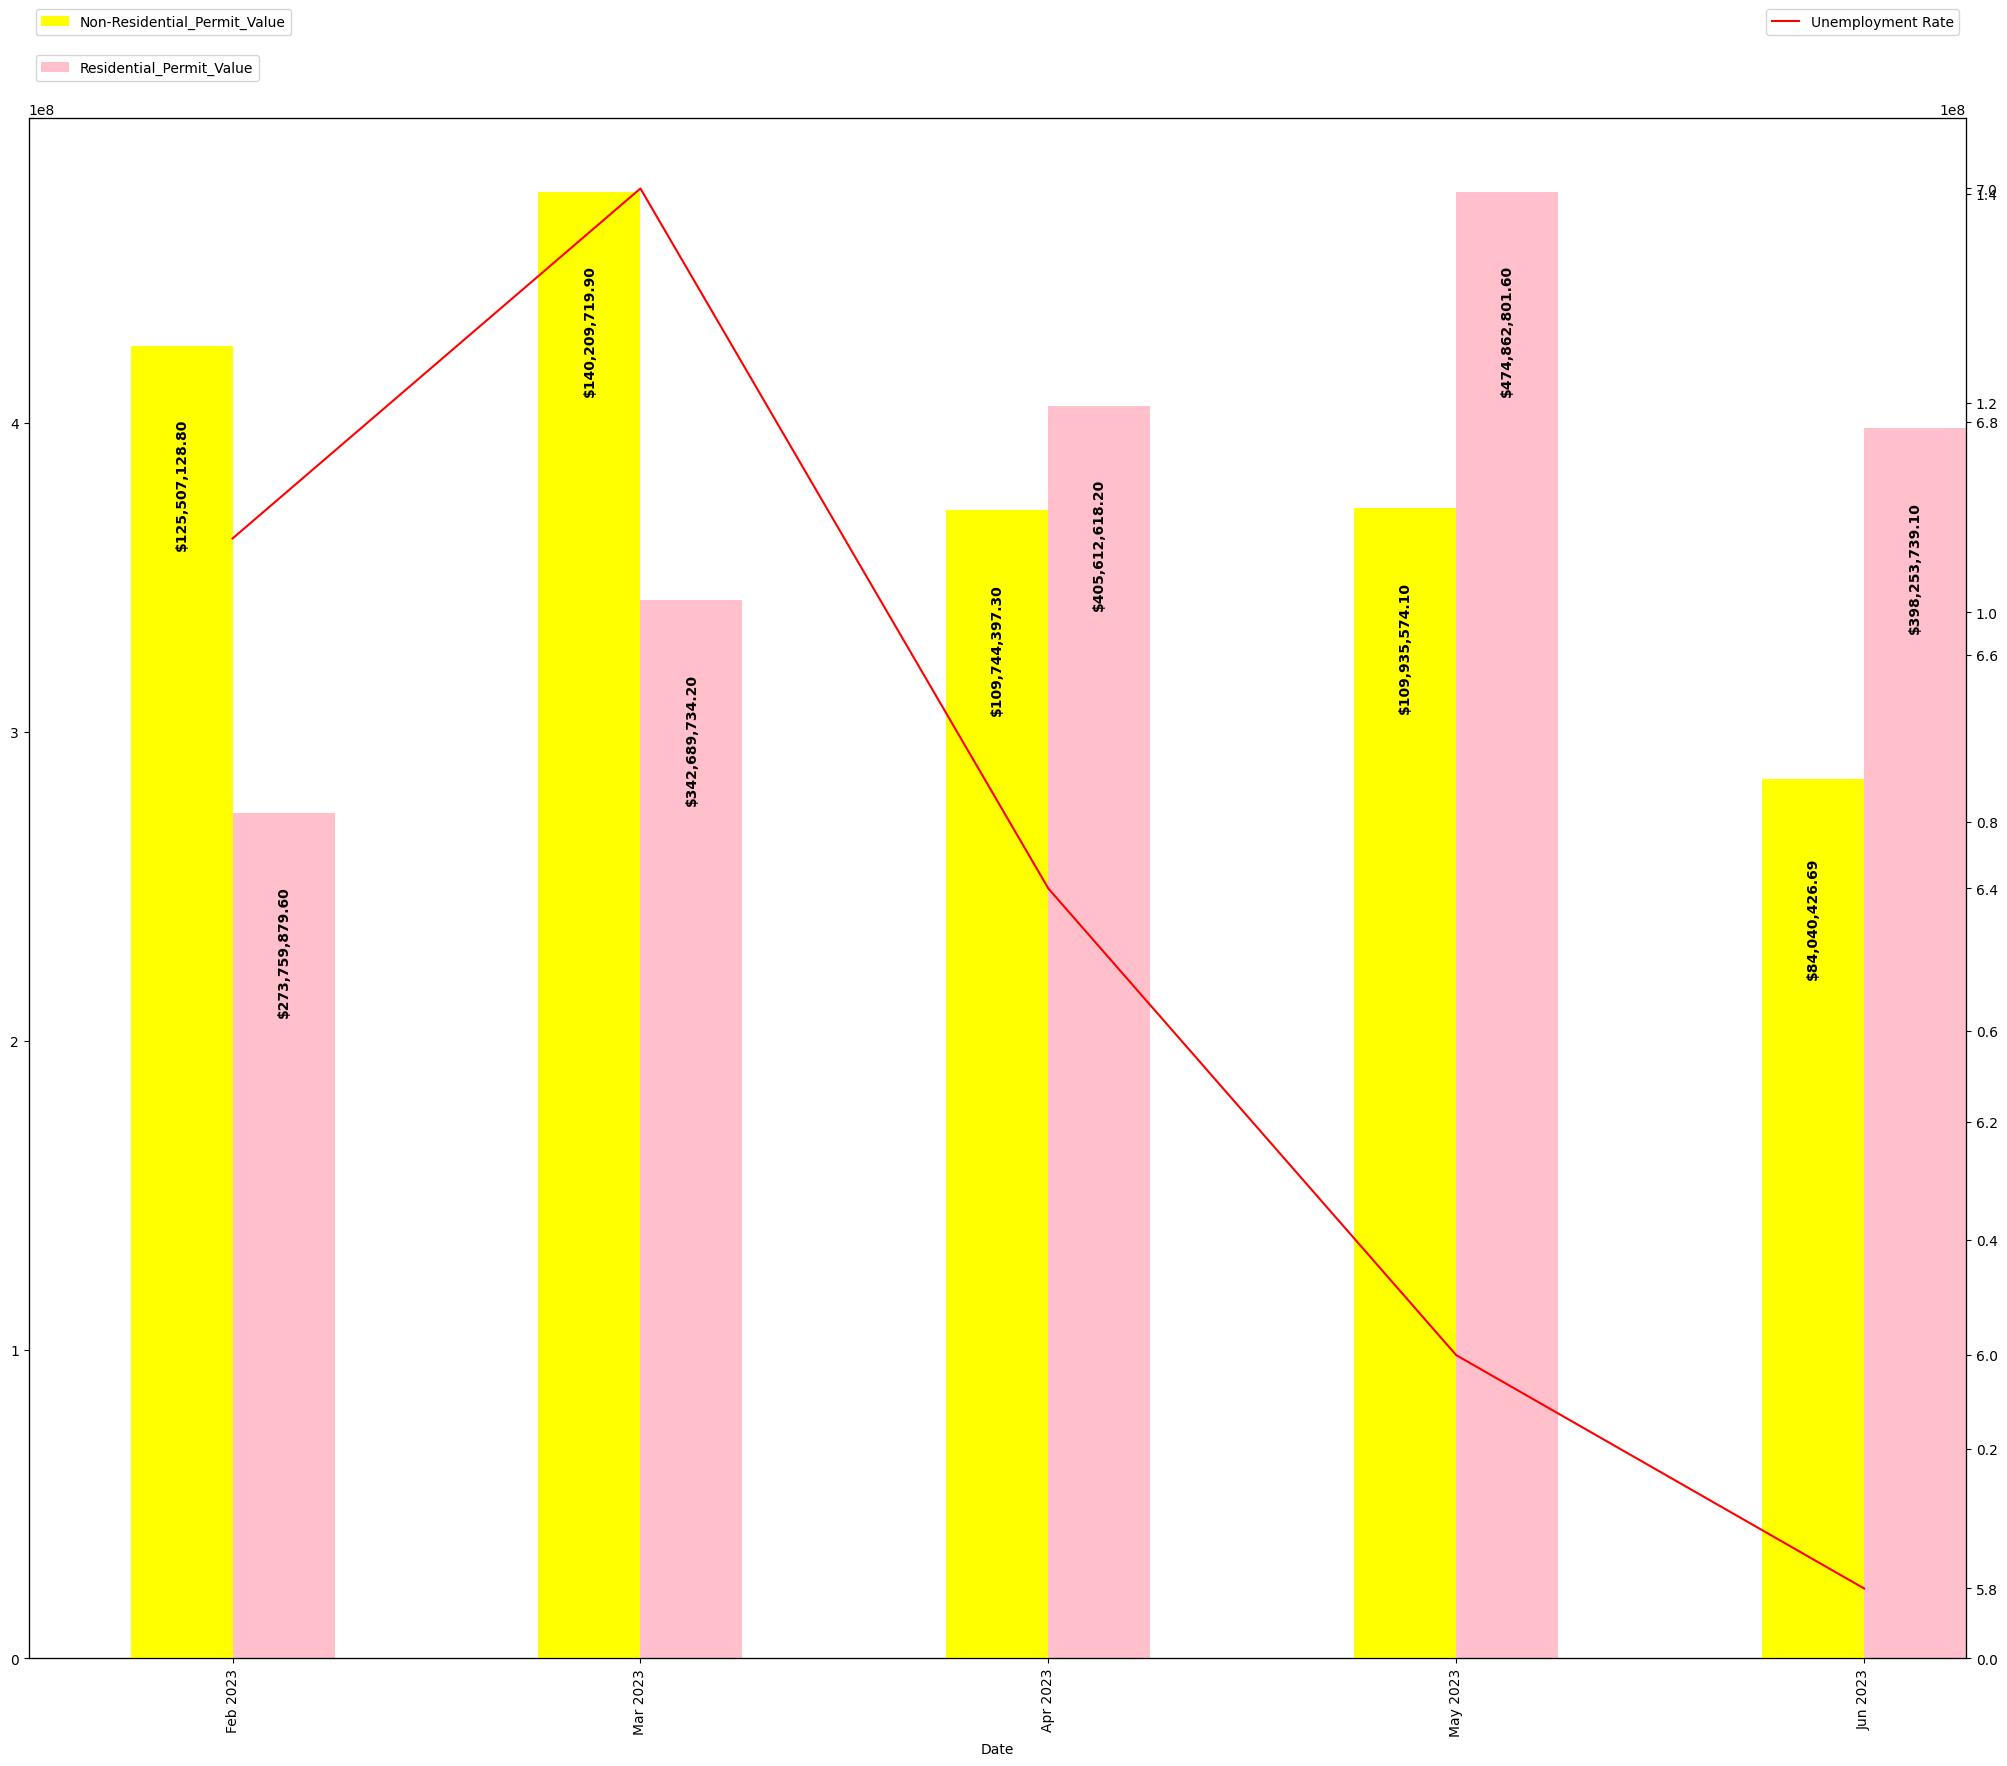

In [48]:
re_df=df.rename(columns={"Calgary (CER) Unemployment rate (%)":"Unemployment_Rate","City of Calgary Building Permits Residential Value ($)": "Residential_Permit_Value", "City of Calgary Building Permits Non-Residential Value ($)": "NonResidential_Permit_Value", "Calgary (CMA) Inflation Rate (%change)": "Inflation_Rate"}).reset_index()
mask2019 = re_df[(re_df['Date'] > '2023-01-01')]

df = mask2019.set_index(['Date'])
display(df)
fig = plt.figure(figsize = (25, 20))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax3 = ax1.twinx()

df['Residential_Permit_Value'].plot(kind='bar', color='pink', ax=ax1, position=0, width=0.25, label="Residential_Permit_Value")
ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left')
df['NonResidential_Permit_Value'].plot(kind='bar', color='yellow', ax=ax2, position=1, width=0.25, label="Non-Residential_Permit_Value")
ax2.legend(bbox_to_anchor=(0., 1.05, 1., 1), loc='lower left')
df['Unemployment_Rate'].plot(kind='line', color='red',ax=ax3,label='Unemployment Rate')
ax3.legend(bbox_to_anchor=(0., 1.05, 1., .102), loc='lower right')

ax1.set_ylabel = ('Residential_Permit_Value')
ax2.set_ylabel = ('NonResidential_Permit_Value')


def add_labels(ax):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2.

        label ='${:,.2f}'.format(y_value)

        ax.annotate(            
            label,                      
            (x_value, y_value),        
            xytext=(0, -100),         
            textcoords="offset points", 
            ha='center',                
            va='center',rotation='vertical',weight='bold')  

add_labels(ax1)
add_labels(ax2)
add_labels(ax3)

xtl=[]
xtl=[item.get_text()[:10] for item in ax1.get_xticklabels()]
xtl= (pd.to_datetime(xtl).strftime("%b %Y"))
_=ax1.set_xticklabels(xtl)

plt.xticks(rotation=45)
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()




In [32]:
df

,Date,Calgary (CER) Unemployment rate (%),Alberta Unemployment Rate (%),Canada Unemployment rate (%),Calgary (CER) Total Employment ('000 Persons),Calgary (CER) Total Employment month-over-month change ('000 Persons),Calgary (CER) Total Employment year-over-year change ('000 Persons),Calgary (CMA) Average Hourly Wage Rate ($),City of Calgary Building Permits Residential Value ($),City of Calgary Building Permits Non-Residential Value ($),Calgary (City) Total Housing Starts (units),Calgary (CMA) Total Housing Starts (units),Calgary (CER) Retail Sales ($billions),Calgary (CMA) Inflation Rate (%change)
362,2002-03-01,5.1,5.3,8.5,605.1,-1.1,28.5,19.13,142476752.1,4.510599e+07,762.0,855,1.18,2.73
363,2002-04-01,5.5,5.5,8.3,607.4,2.3,26.7,19.36,178512153.3,6.342788e+07,1102.0,1207,1.23,4.29
364,2002-05-01,6.0,5.8,8.1,607.2,-0.2,19.3,19.47,141117954.7,9.427614e+07,1068.0,1292,1.25,1.01
365,2002-06-01,6.0,5.7,7.7,609.9,2.7,9.0,19.39,164043354.9,5.429061e+07,1351.0,1563,1.25,1.01
366,2002-07-01,6.2,5.6,7.6,615.6,5.7,5.5,19.04,172549893.6,6.508729e+07,686.0,865,1.22,2.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,2023-02-01,6.7,6.0,5.1,914.3,-9.2,19.6,36.50,273759879.6,1.255071e+08,1032.0,1238,3.42,3.93
614,2023-03-01,7.0,6.3,5.4,916.3,2.0,20.9,36.20,342689734.2,1.402097e+08,937.0,1094,3.36,3.69
615,2023-04-01,6.4,6.3,5.3,931.9,15.6,24.3,36.30,405612618.2,1.097444e+08,904.0,1164,3.39,4.88
616,2023-05-01,6.0,6.0,5.3,946.9,15.0,28.1,36.10,474862801.6,1.099356e+08,1836.0,2076,3.47,3.49


In [ ]:

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 10))
# # Create a line plot
# line1 = ax1.plot(Date, Calgary_Unemployment_Rate, label='Calgary Unemployment Rate', color='blue', linestyle='-')
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Calgary Unemployment Rate')
# ax1.set_title('Calgary Unemployment Rate During Years 2000-2023')
# ax1.legend()
# mpldatacursor.datacursor(line1)

# ax2.plot(Date, Residential_Permit, label='Calgary Residential Permit Value', color='red', linestyle='--')
# ax2.set_xlabel('Date')
# ax2.set_ylabel('Calgary Residential Permit Value')
# ax2.set_title('Calgary Residential Permit Value During Years 2000-2023')
# ax2.legend()

# plt.tight_layout()
# plt.gcf().autofmt_xdate()
# # Show the plot
# plt.show()


In [ ]:
#df['Date'] = pd.to_datetime(df['Date'], format='%YYYY-%mm-%dd')

In [ ]:
# fig = px.line(df, x=x, y=y, hover_name=y, title = "Calgary Unemployment Rate 2000-2023",
#               labels = {'x': 'Date', 'y':'Unemployment Rate (%)'})
# #fig.update_xaxes(range=[df['Date'].min(), df['Date'].max()]) 
# fig.update_xaxes(range=["2000-01-01", "2023-08-31"])
# fig.update_yaxes(range=[2, 15])
# fig.show()

In [5]:
df

,Date,Calgary (CER) Unemployment rate (%),Alberta Unemployment Rate (%),Canada Unemployment rate (%),Calgary (CER) Total Employment ('000 Persons),Calgary (CER) Total Employment month-over-month change ('000 Persons),Calgary (CER) Total Employment year-over-year change ('000 Persons),Calgary (CMA) Average Hourly Wage Rate ($),City of Calgary Building Permits Residential Value ($),City of Calgary Building Permits Non-Residential Value ($),Calgary (City) Total Housing Starts (units),Calgary (CMA) Total Housing Starts (units),Calgary (CER) Retail Sales ($billions),Calgary (CMA) Inflation Rate (%change)
362,2002-03-01,5.1,5.3,8.5,605.1,-1.1,28.5,19.13,142476752.1,4.510599e+07,762.0,855,1.18,2.73
363,2002-04-01,5.5,5.5,8.3,607.4,2.3,26.7,19.36,178512153.3,6.342788e+07,1102.0,1207,1.23,4.29
364,2002-05-01,6.0,5.8,8.1,607.2,-0.2,19.3,19.47,141117954.7,9.427614e+07,1068.0,1292,1.25,1.01
365,2002-06-01,6.0,5.7,7.7,609.9,2.7,9.0,19.39,164043354.9,5.429061e+07,1351.0,1563,1.25,1.01
366,2002-07-01,6.2,5.6,7.6,615.6,5.7,5.5,19.04,172549893.6,6.508729e+07,686.0,865,1.22,2.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,2023-02-01,6.7,6.0,5.1,914.3,-9.2,19.6,36.50,273759879.6,1.255071e+08,1032.0,1238,3.42,3.93
614,2023-03-01,7.0,6.3,5.4,916.3,2.0,20.9,36.20,342689734.2,1.402097e+08,937.0,1094,3.36,3.69
615,2023-04-01,6.4,6.3,5.3,931.9,15.6,24.3,36.30,405612618.2,1.097444e+08,904.0,1164,3.39,4.88
616,2023-05-01,6.0,6.0,5.3,946.9,15.0,28.1,36.10,474862801.6,1.099356e+08,1836.0,2076,3.47,3.49


In [33]:
re_df=df.rename(columns={"Calgary (CER) Unemployment rate (%)":"Unemployment_Rate","City of Calgary Building Permits Residential Value ($)": "Residential_Permit_Value", "City of Calgary Building Permits Non-Residential Value ($)": "NonResidential_Permit_Value", "Calgary (CMA) Inflation Rate (%change)": "Inflation_Rate"}).reset_index()

In [34]:
re_df

,index,Date,Unemployment_Rate,Alberta Unemployment Rate (%),Canada Unemployment rate (%),Calgary (CER) Total Employment ('000 Persons),Calgary (CER) Total Employment month-over-month change ('000 Persons),Calgary (CER) Total Employment year-over-year change ('000 Persons),Calgary (CMA) Average Hourly Wage Rate ($),Residential_Permit_Value,NonResidential_Permit_Value,Calgary (City) Total Housing Starts (units),Calgary (CMA) Total Housing Starts (units),Calgary (CER) Retail Sales ($billions),Inflation_Rate
0,362,2002-03-01,5.1,5.3,8.5,605.1,-1.1,28.5,19.13,142476752.1,4.510599e+07,762.0,855,1.18,2.73
1,363,2002-04-01,5.5,5.5,8.3,607.4,2.3,26.7,19.36,178512153.3,6.342788e+07,1102.0,1207,1.23,4.29
2,364,2002-05-01,6.0,5.8,8.1,607.2,-0.2,19.3,19.47,141117954.7,9.427614e+07,1068.0,1292,1.25,1.01
3,365,2002-06-01,6.0,5.7,7.7,609.9,2.7,9.0,19.39,164043354.9,5.429061e+07,1351.0,1563,1.25,1.01
4,366,2002-07-01,6.2,5.6,7.6,615.6,5.7,5.5,19.04,172549893.6,6.508729e+07,686.0,865,1.22,2.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,613,2023-02-01,6.7,6.0,5.1,914.3,-9.2,19.6,36.50,273759879.6,1.255071e+08,1032.0,1238,3.42,3.93
252,614,2023-03-01,7.0,6.3,5.4,916.3,2.0,20.9,36.20,342689734.2,1.402097e+08,937.0,1094,3.36,3.69
253,615,2023-04-01,6.4,6.3,5.3,931.9,15.6,24.3,36.30,405612618.2,1.097444e+08,904.0,1164,3.39,4.88
254,616,2023-05-01,6.0,6.0,5.3,946.9,15.0,28.1,36.10,474862801.6,1.099356e+08,1836.0,2076,3.47,3.49


In [35]:

# # Assuming re_df is your DataFrame
# re_df['Date'] = pd.to_datetime(re_df['Date'])

# # Group 'Residential_Permit_Value' and 'NonResidential_Permit_Value' by year
# result = re_df.groupby(re_df['Date'].dt.year)[['Residential_Permit_Value', 'NonResidential_Permit_Value']].sum().reset_index()

# # Calculate the annual unemployment rate and set the 'Date' column as the index
# Annual_Unemployment_Rate = re_df.set_index('Date')['Unemployment_Rate'].resample('Y').mean()

# # Create a DataFrame from the resampled unemployment rate
# Annual_Unemployment_Rate = Annual_Unemployment_Rate.reset_index()
# Annual_Unemployment_Rate.columns = ['Date', 'Annual_Unemployment_Rate']

# # Convert the 'Date' column in the 'result' DataFrame to datetime64[ns]
# result['Date'] = pd.to_datetime(result['Date'], format='%Y')

# # Merge the 'annual_unemployment_rate' DataFrame with the 'result' DataFrame based on the 'Date' column
# result = pd.merge(result, Annual_Unemployment_Rate, on='Date')

# # Print or use the final 'result' DataFrame as needed
# print(result)




# re_df['Date'] = pd.to_datetime(re_df['Date'])

# # Group 'Residential_Permit_Value' and 'NonResidential_Permit_Value' by year
# result = re_df.groupby(re_df['Date'].dt.year)[['Residential_Permit_Value', 'NonResidential_Permit_Value']].sum().reset_index()

# # Calculate the annual unemployment rate and set the 'Date' column as the index
# Annual_Unemployment_Rate = re_df.groupby(re_df['Date'].dt.year)[['Unemployment_Rate']].mean().reset_index()

# # Create a DataFrame from the resampled unemployment rate
# Annual_Unemployment_Rate = Annual_Unemployment_Rate.reset_index()
# Annual_Unemployment_Rate.columns = ['Date', 'Annual_Unemployment_Rate']

# # Convert the 'Date' column in the 'result' DataFrame to datetime64[ns]
# result['Date'] = pd.to_datetime(result['Date'], format='%Y')

# # Merge the 'annual_unemployment_rate' DataFrame with the 'result' DataFrame based on the 'Date' column
# result = pd.merge(result, Annual_Unemployment_Rate, on='Date')

# # Print or use the final 'result' DataFrame as needed
# print(result)

re_df['Date'] = pd.to_datetime(re_df['Date'])

# Group 'Residential_Permit_Value' and 'NonResidential_Permit_Value' by year
#result = re_df.groupby(re_df['Date'].dt.year)[['Residential_Permit_Value', 'NonResidential_Permit_Value']].sum().reset_index()





In [37]:
result = re_df.groupby(re_df['Date'].dt.year).agg({'Residential_Permit_Value': 'sum', 'NonResidential_Permit_Value':'sum', 'Unemployment_Rate': 'mean'})#.reset_index()

# Print or use the final 'result' DataFrame as needed
display(result)

,Residential_Permit_Value,NonResidential_Permit_Value,Unemployment_Rate
Date,,,
2002,1.416430e+09,5.783561e+08,5.770000
2003,1.473616e+09,9.682054e+08,5.300000
2004,1.562705e+09,6.800189e+08,5.008333
2005,1.917170e+09,1.677694e+09,3.958333
2006,2.365588e+09,2.363098e+09,3.500000
2007,2.486575e+09,3.028465e+09,3.350000
2008,1.303698e+09,2.634092e+09,3.566667
2009,1.443781e+09,2.210801e+09,6.675000
2010,1.694339e+09,1.212141e+09,7.025000


In [38]:
result['Unemployment_Rate']

Date
2002     5.770000
2003     5.300000
2004     5.008333
2005     3.958333
2006     3.500000
2007     3.350000
2008     3.566667
2009     6.675000
2010     7.025000
2011     5.858333
2012     4.908333
2013     4.825000
2014     4.975000
2015     6.141667
2016     8.991667
2017     8.866667
2018     7.600000
2019     7.125000
2020    11.333333
2021     9.216667
2022     6.191667
2023     6.383333
Name: Unemployment_Rate, dtype: float64

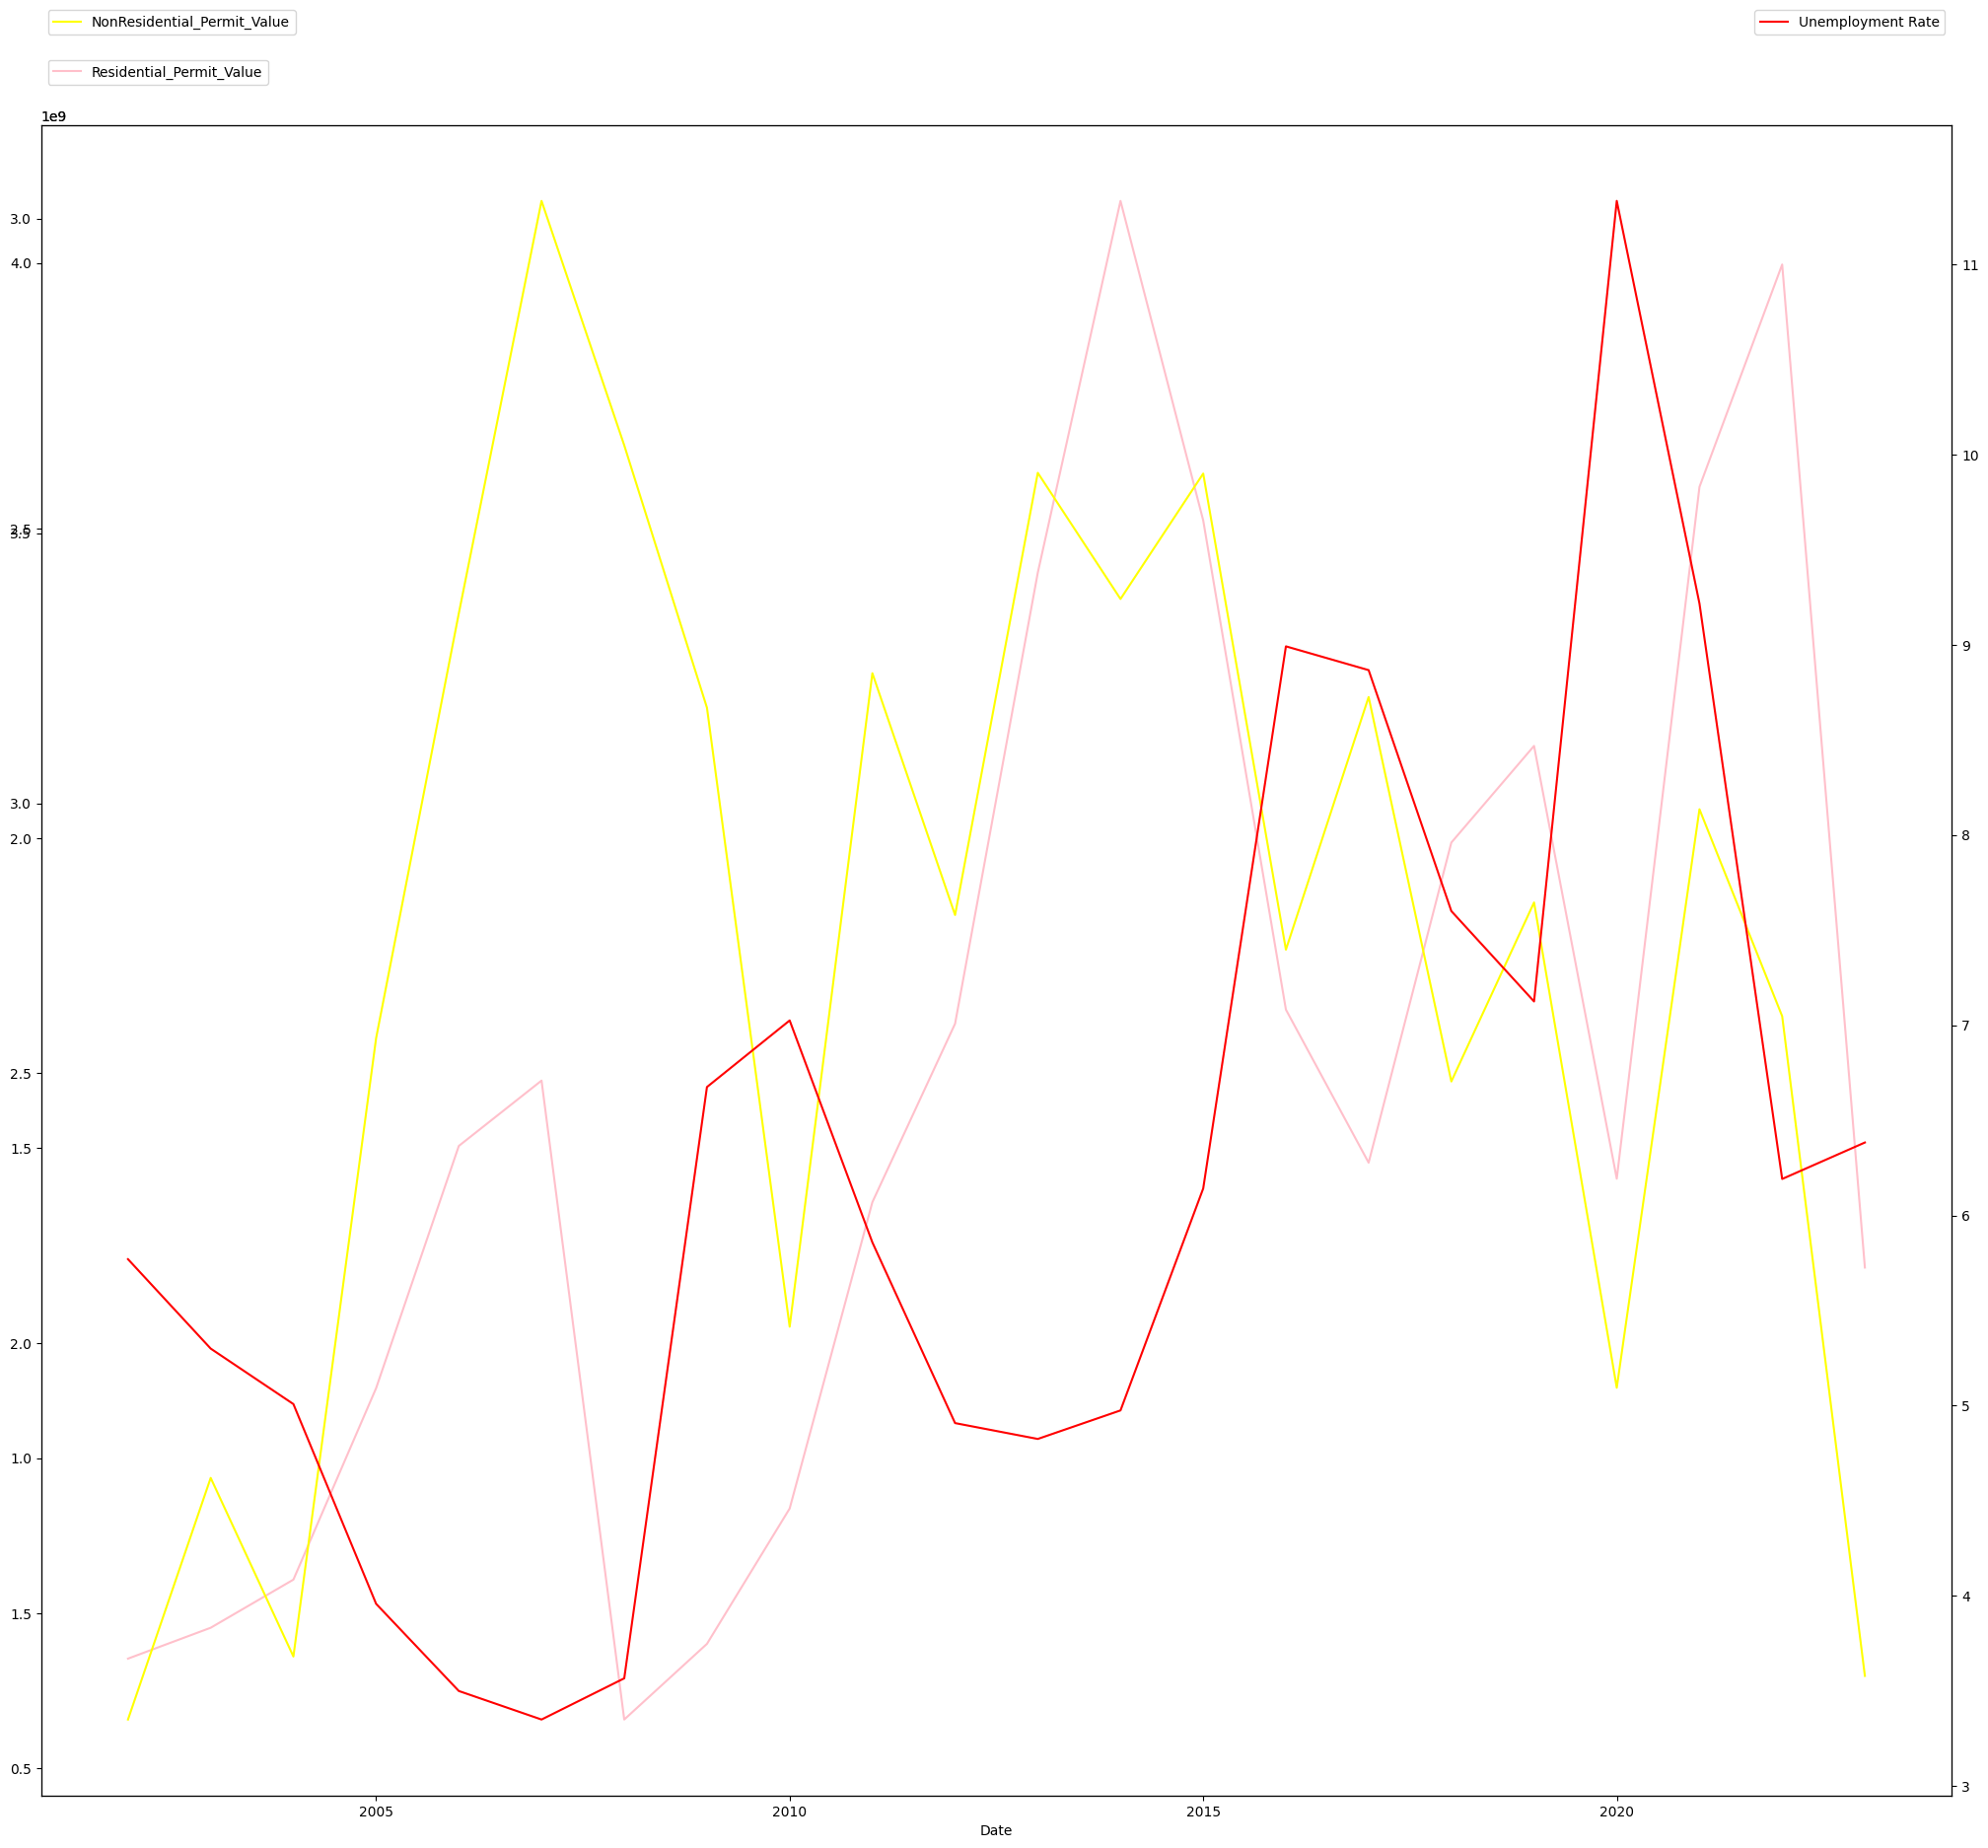

In [54]:

fig = plt.figure(figsize = (25, 22))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax3 = ax2.twinx()


result['Residential_Permit_Value'].plot(kind='line', color='pink', ax=ax1)#, position=0, width=0.25, label="Residential_Permit_Value")
ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left')
result['NonResidential_Permit_Value'].plot(kind='line', color='yellow', ax=ax2)#, position=1, width=0.25, label="Non-Residential_Permit_Value")
ax2.legend(bbox_to_anchor=(0., 1.05, 1., 1), loc='lower left')
result['Unemployment_Rate'].plot(kind='line', color='red',ax=ax3,label='Unemployment Rate')
ax3.legend(bbox_to_anchor=(0., 1.05, 1., .102), loc='lower right')


ax1.set_ylabel = ('Residential_Permit_Value')
ax2.set_ylabel = ('NonResidential_Permit_Value')


def add_labels(ax):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2.

        label ='${:,.2f}'.format(y_value)

        ax.annotate(            
            label,                      
            (x_value, y_value),        
            xytext=(0, -100),         
            textcoords="offset points", 
            ha='center',                
            va='center',rotation='vertical',weight='bold')  

#add_labels(ax1)
#add_labels(ax2)
#add_labels(ax3)

#xtl=[]
#xtl=[item.get_text()[:10] for item in ax1.get_xticklabels()]
#xtl= (pd.to_datetime(xtl).strftime("%Y"))
#_=ax1.set_xticklabels(xtl)

plt.xticks(rotation=45)
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()




In [ ]:
re_df